# Import Libraries

In [1]:
import pandas as pd
import lyrics_extractor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
from collections import Counter
import pythainlp as pn

# Extract Lyrics

In [ ]:
df_bodyslam = lyrics_extractor.get_song_df("บอดี้สแลม")
df_bodyslam.head()

In [3]:
df_bodyslam.shape

(77, 3)

In [ ]:
df_carabao = lyrics_extractor.get_song_df("คาราบาว")
df_carabao.head()

In [5]:
df_carabao.shape

(66, 3)

In [ ]:
df_puu = lyrics_extractor.get_song_df('ปู%20พงษ์สิทธิ์%20คำภีร์')
df_puu['Artist'] = "ปู พงษ์สิทธิ์ คำภีร์"
df_puu.head()

In [7]:
df_puu.shape

(93, 3)

In [ ]:
df_bird = lyrics_extractor.get_song_df('เบิร์ด%20ธงไชย%20แมคอินไตย์')
df_bird['Artist'] = "เบิร์ด ธงไชย"
df_bird.head()

In [9]:
df_bird.shape

(98, 3)

# Process Word list

In [10]:
wordList_bodyslam = []
wordList_carabao = []
wordList_ppuu = []
wordList_pbird = []

for Lyrics in df_bodyslam['Lyrics']:
  wordList_bodyslam = wordList_bodyslam + pn.word_tokenize(Lyrics)

for Lyrics in df_carabao['Lyrics']:
  wordList_carabao = wordList_carabao + pn.word_tokenize(Lyrics)

for Lyrics in df_puu['Lyrics']:
  wordList_ppuu = wordList_ppuu + pn.word_tokenize(Lyrics)

for Lyrics in df_bird['Lyrics']:
  wordList_pbird = wordList_pbird + pn.word_tokenize(Lyrics)

# Word Cloud

In [11]:
def create_wordcloud(wordlist):
    path = 'IBMPlexSansThaiLooped-Regular.ttf'
    wordcloud = WordCloud(
                        font_path=path, # font THSarabunNew 
                        stopwords=thai_stopwords(), # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                        relative_scaling=0.3,
                        min_font_size=1,
                        background_color = "white",
                        width=1024,
                        height=768,
                        max_words=500, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                        collocations=False,
                        regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                        margin=2
                        ).generate(' '.join(wordlist))

    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13044\69841968.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


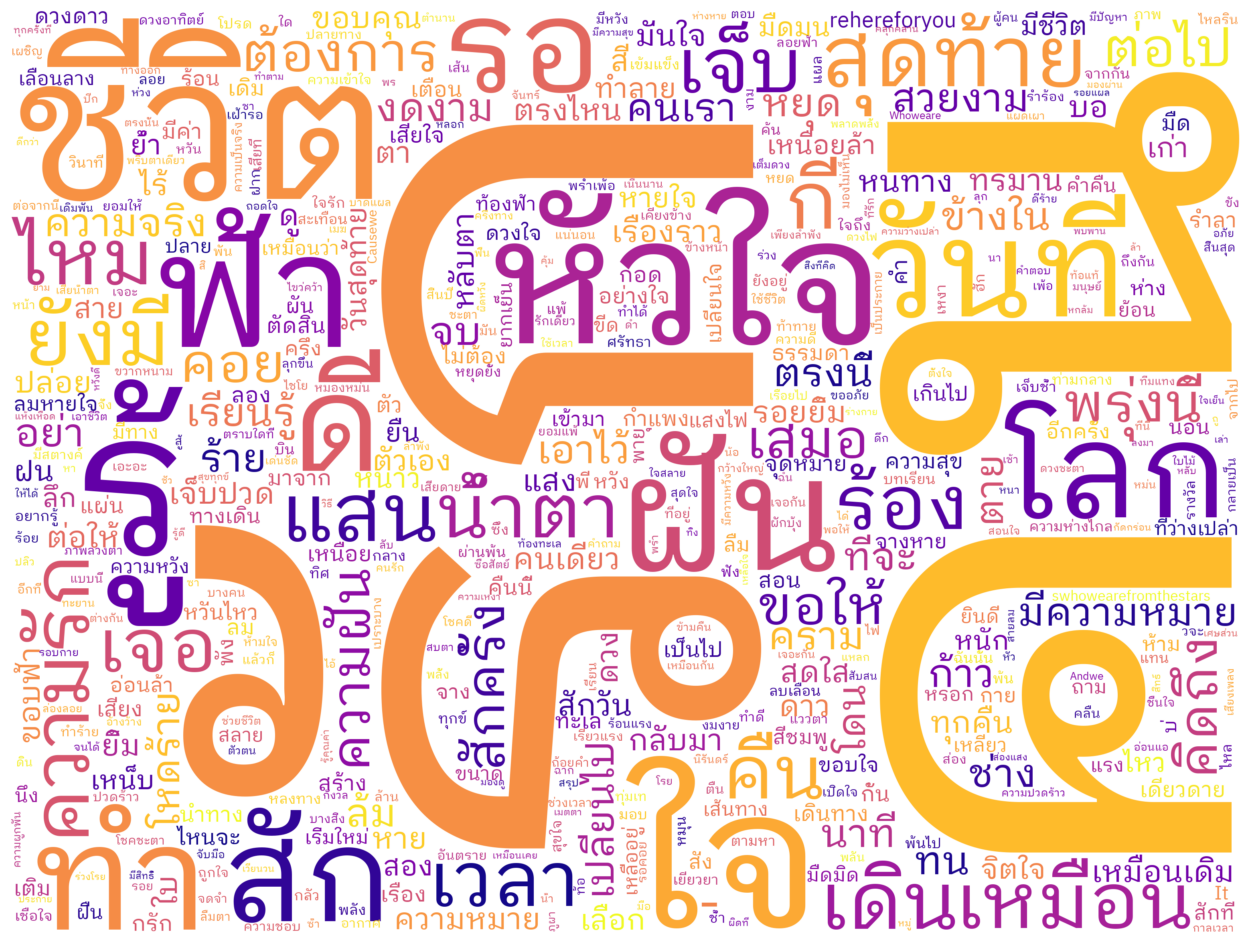

In [12]:
create_wordcloud(wordList_bodyslam)

C:\Users\User\AppData\Local\Temp\ipykernel_13044\69841968.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


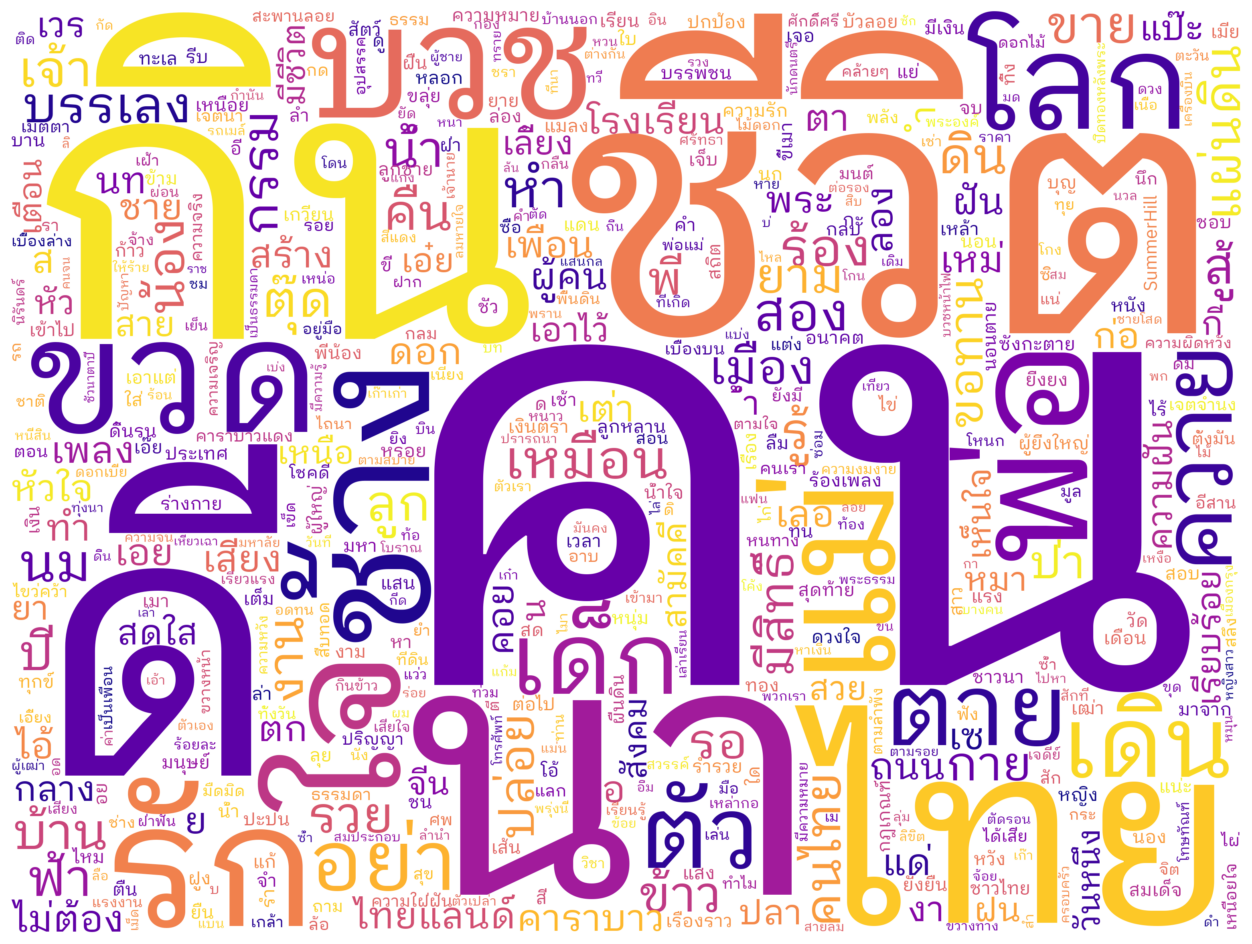

In [13]:
create_wordcloud(wordList_carabao)

C:\Users\User\AppData\Local\Temp\ipykernel_13044\69841968.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


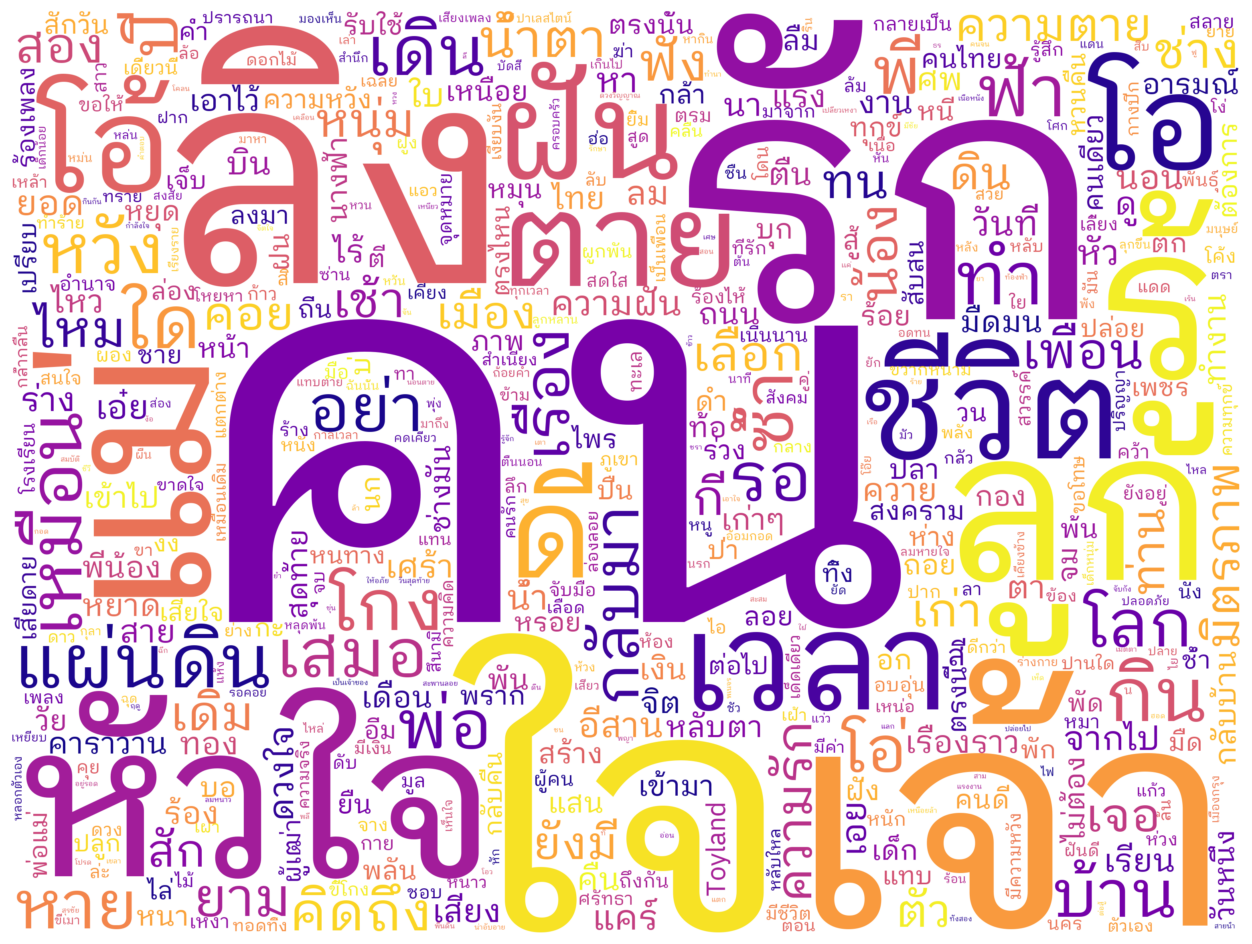

In [14]:
create_wordcloud(wordList_ppuu)

C:\Users\User\AppData\Local\Temp\ipykernel_13044\69841968.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


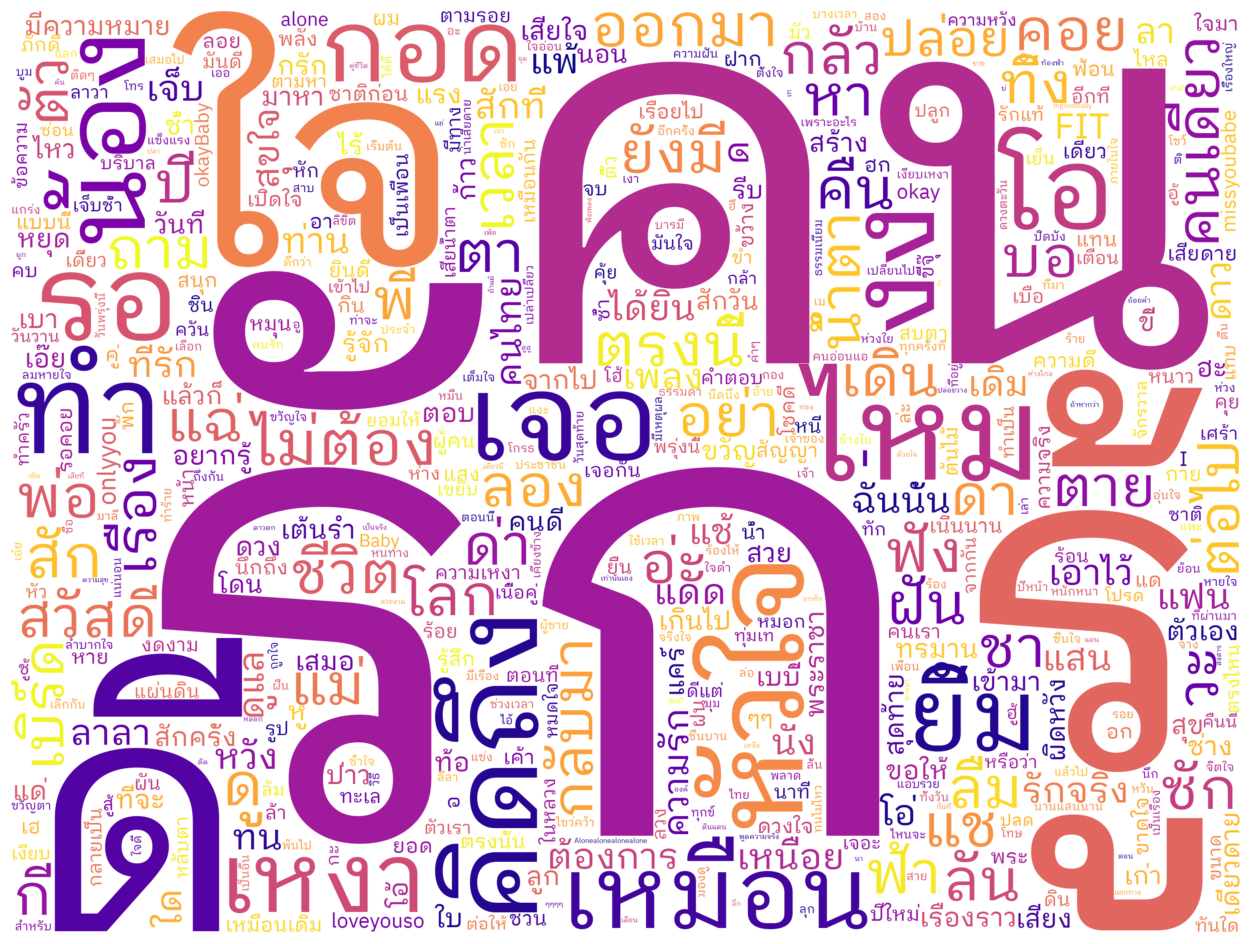

In [15]:
create_wordcloud(wordList_pbird)

# Lyrics word analysis

In [16]:
word_count_bs = Counter(wordList_bodyslam)
word_count_cb = Counter(wordList_carabao)
word_count_pp = Counter(wordList_ppuu)
word_count_pb = Counter(wordList_pbird)

## Bodyslam

In [17]:
sum(word_count_bs.values())

19391

In [18]:
word_count_bs['ชีวิต']

172

In [19]:
word_count_bs.most_common()[:20]

[('ไม่', 655),
 ('ที่', 531),
 ('จะ', 517),
 ('เธอ', 493),
 ('ฉัน', 402),
 ('ยัง', 393),
 ('มี', 391),
 ('ก็', 351),
 ('มัน', 342),
 ('ให้', 269),
 ('ไป', 257),
 ('ได้', 225),
 ('รัก', 221),
 ('ใคร', 209),
 ('ต้อง', 191),
 ('เป็น', 191),
 ('ว่า', 190),
 ('เรา', 187),
 ('แค่', 184),
 ('คน', 181)]

In [20]:
bs_clean_word = [word for word in wordList_bodyslam if word not in thai_stopwords()]
Counter(bs_clean_word).most_common()[:20]

[('รัก', 221),
 ('คน', 181),
 ('ชีวิต', 172),
 ('รู้', 171),
 ('ใจ', 152),
 ('หัวใจ', 148),
 ('ฝัน', 100),
 ('ฟ้า', 97),
 ('ทำ', 71),
 ('วันที่', 70),
 (')', 69),
 ('ดี', 68),
 ('(', 68),
 ('โลก', 66),
 ('สัก', 62),
 ('รอ', 59),
 ('สุดท้าย', 58),
 ('แสน', 50),
 ('เดิน', 48),
 ('กี่', 47)]

## Carabao

In [21]:
sum(word_count_cb.values())

16184

In [22]:
word_count_cb['ชีวิต']

58

In [23]:
word_count_cb.most_common()[:20]

[('มี', 310),
 ('ไม่', 307),
 ('เป็น', 251),
 ('มา', 226),
 ('ไป', 203),
 ('ให้', 193),
 ('ก็', 186),
 ('จะ', 169),
 ('ที่', 161),
 ('คน', 147),
 ('มัน', 130),
 ('เรา', 114),
 ('แต่', 111),
 ('...', 100),
 ('ใน', 86),
 ('กัน', 85),
 ('อยู่', 84),
 ('ใคร', 84),
 ('ยัง', 83),
 ('ได้', 80)]

In [24]:
cb_clean_word = [word for word in wordList_carabao if word not in thai_stopwords()]
Counter(cb_clean_word).most_common()[:20]

[('คน', 147),
 ('...', 100),
 ('กิน', 75),
 ('ดี', 66),
 ('ชีวิต', 58),
 ('นา', 57),
 ('ไทย', 56),
 ('รัก', 54),
 ('ช้าง', 53),
 ('แม่', 46),
 ('พ่อ', 46),
 ('ใจ', 43),
 ('บวช', 43),
 ('ขวด', 43),
 ('โลก', 41),
 ('เด็ก', 41),
 ('ตาย', 41),
 ('ตัว', 41),
 ('ควาย', 40),
 ('เดิน', 40)]

## P'Puu

In [25]:
sum(word_count_pp.values())

16642

In [26]:
word_count_pp['ชีวิต']

55

In [27]:
word_count_pp.most_common()[:20]

[('ไม่', 375),
 ('ฉัน', 278),
 ('จะ', 264),
 ('เธอ', 260),
 ('มี', 254),
 ('ไป', 211),
 ('มา', 211),
 ('ให้', 194),
 ('ที่', 186),
 ('คน', 159),
 ('อยู่', 156),
 ('เรา', 149),
 ('ก็', 143),
 ('เป็น', 127),
 ('รัก', 114),
 ('แต่', 112),
 ('ได้', 104),
 ('ใคร', 94),
 ('ใน', 93),
 ('ใจ', 93)]

In [28]:
pp_clean_word = [word for word in wordList_ppuu if word not in thai_stopwords()]
Counter(pp_clean_word).most_common()[:20]

[('คน', 159),
 ('รัก', 114),
 ('ใจ', 93),
 ('เจ้า', 66),
 ('ลิง', 63),
 ('หัวใจ', 62),
 ('รู้', 62),
 ('ลูก', 59),
 ('แม่', 57),
 ('ชีวิต', 55),
 ('เวลา', 52),
 ('ฝัน', 49),
 ('โอ้', 48),
 ('โอ', 47),
 ('ตาย', 46),
 ('ดี', 42),
 ('แผ่นดิน', 42),
 ('กิน', 41),
 ('ใด', 38),
 ('เหมือน', 38)]

## P'Bird

In [29]:
sum(word_count_pb.values())

26340

In [30]:
word_count_pb['ชีวิต']

44

In [31]:
word_count_pb.most_common()[:20]

[('ไม่', 917),
 ('เธอ', 744),
 ('จะ', 690),
 ('ก็', 591),
 ('ฉัน', 515),
 ('ที่', 470),
 ('มี', 454),
 ('ให้', 426),
 ('ไป', 339),
 ('มา', 314),
 ('รัก', 312),
 ('ได้', 293),
 ('เป็น', 291),
 ('ว่า', 290),
 ('มัน', 281),
 ('คน', 274),
 ('เรา', 249),
 ('กัน', 240),
 ('ต้อง', 236),
 ('อยู่', 234)]

In [32]:
pb_clean_word = [word for word in wordList_pbird if word not in thai_stopwords()]
Counter(pb_clean_word).most_common()[:20]

[('รัก', 312),
 ('คน', 274),
 ('รู้', 227),
 ('ดี', 201),
 ('(', 172),
 (')', 155),
 ('ใจ', 150),
 ('ไหม', 126),
 ('ทำ', 98),
 ('หัวใจ', 98),
 ('เจอ', 85),
 ('งง', 84),
 (',', 81),
 ('คิดถึง', 81),
 ('รอ', 80),
 ('โอ', 72),
 ('น้อง', 71),
 ('เหมือน', 70),
 ('กอด', 70),
 ('ยิ้ม', 69)]

# Corelation

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr

wordlist_dict = {"wordlist_bs":bs_clean_word, "wordlist_cb": cb_clean_word, 
                 "wordlist_ppuu": pp_clean_word, "wordlist_pbird": pb_clean_word}

def lyrics_corelation(artist_a, artist_b):
    wordlist_a = wordlist_dict[f"wordlist_{artist_a}"]
    wordlist_b = wordlist_dict[f"wordlist_{artist_b}"]

    artist_a_lyrics = " ".join(wordlist_a)
    artist_b_lyrics = " ".join(wordlist_b)

    lyrics_docs = [artist_a_lyrics, artist_b_lyrics]

    vectorizer = TfidfVectorizer()

    tfidf_matrix = vectorizer.fit_transform(lyrics_docs)

    tfidf_dense = tfidf_matrix.toarray()

    artist_a_tfidf = tfidf_dense[0]
    artist_b_tfidf = tfidf_dense[1]

    correlation, p_value = pearsonr(artist_a_tfidf, artist_b_tfidf)

    plt.figure(figsize=(8, 6))

    plt.scatter(artist_a_tfidf, artist_b_tfidf, color='green', alpha=0.6)

    plt.title(f'TF-IDF Correlation: Pearson r={correlation:.2f}, p={p_value:.4f}')
    plt.xlabel(f'Artist 1 TF-IDF ({artist_a}_clean_word)')
    plt.ylabel(f'Artist 2 TF-IDF ({artist_b}_clean_word)')

    plt.grid(True)
    plt.show()


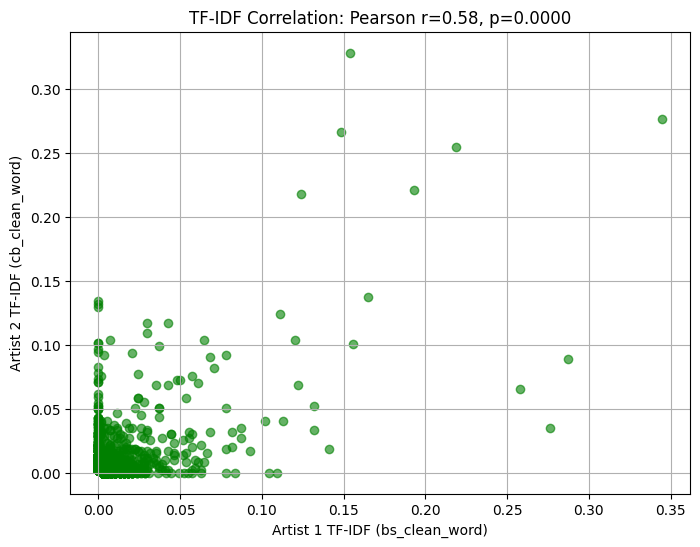

In [73]:
lyrics_corelation("bs","cb")

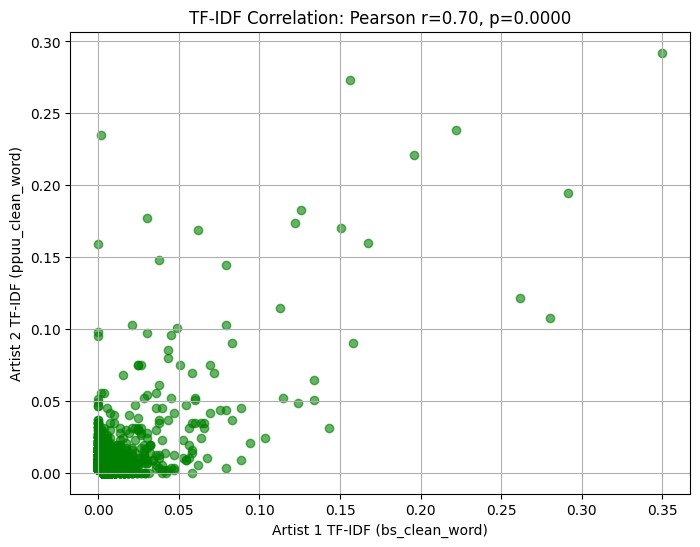

In [74]:
lyrics_corelation("bs","ppuu")

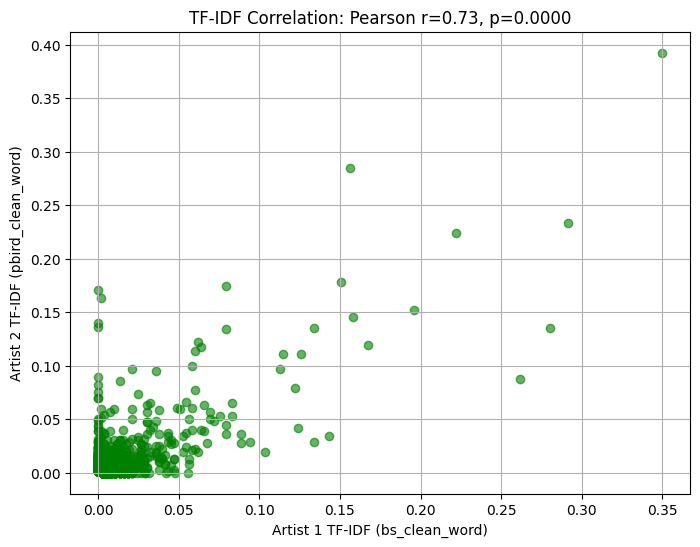

In [75]:
lyrics_corelation("bs","pbird")

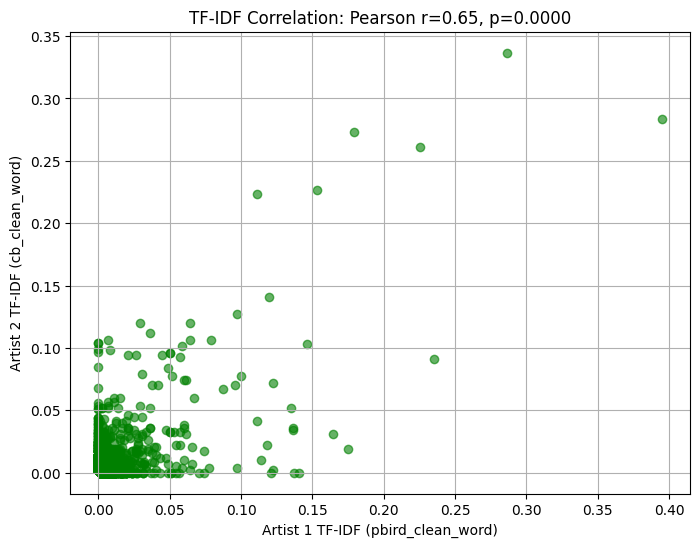

In [76]:
lyrics_corelation("pbird","cb")

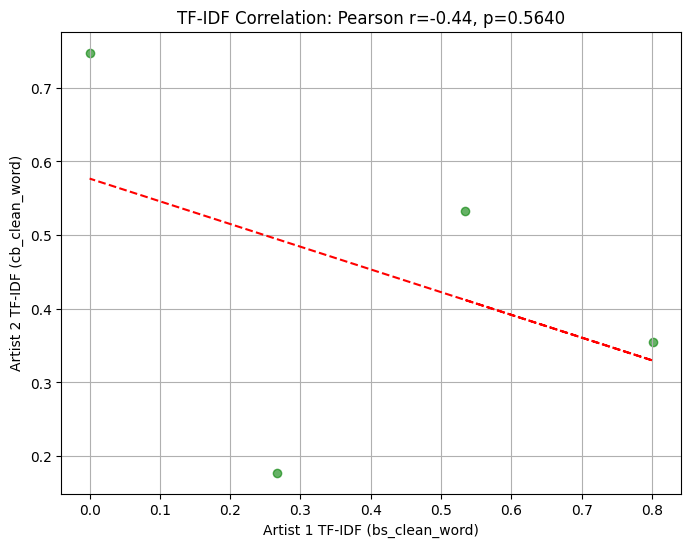

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Example lists of words for each artist
aaaa = ["aa", "bb", "bb", "bb", "cc", "aa"]
bbbb = ["aa", "aa", "bb", "dd", "dd", "dd","aa","bb",'cc']

# Step 1: Join the list of words back into a single string for each artist
bs_lyrics = " ".join(aaaa)
cb_lyrics = " ".join(bbbb)

# Step 2: Combine lyrics into a list of documents
lyrics_docs = [bs_lyrics, cb_lyrics]

# Step 3: Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Step 4: Fit and transform the documents into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(lyrics_docs)

# Step 5: Convert the sparse matrix to a dense matrix (for easier correlation analysis)
tfidf_dense = tfidf_matrix.toarray()

# Artist 1 TF-IDF (bs_clean_word) and Artist 2 TF-IDF (cb_clean_word)
bs_tfidf = tfidf_dense[0]
cb_tfidf = tfidf_dense[1]

# Step 6: Calculate Pearson correlation on the TF-IDF features
correlation, p_value = pearsonr(bs_tfidf, cb_tfidf)

# Step 7: Visualization
plt.figure(figsize=(8, 6))

# Scatter plot of TF-IDF features
plt.scatter(bs_tfidf, cb_tfidf, color='green', alpha=0.6)

# Trendline
z = np.polyfit(bs_tfidf, cb_tfidf, 1)
p = np.poly1d(z)
plt.plot(bs_tfidf, p(bs_tfidf), "r--")

# Labels and Title
plt.title(f'TF-IDF Correlation: Pearson r={correlation:.2f}, p={p_value:.4f}')
plt.xlabel('Artist 1 TF-IDF (bs_clean_word)')
plt.ylabel('Artist 2 TF-IDF (cb_clean_word)')

# Show the plot
plt.grid(True)
plt.show()
